In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
df = pd.read_csv(r'dataset_preprocessing.csv', index_col=0)
df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Survived
0,0.271174,0.125,0.0,0.014151,False,False,True,False,True,False,False,False,True,0
1,0.472229,0.125,0.0,0.139136,True,False,False,True,False,True,False,False,False,1
2,0.321438,0.000,0.0,0.015469,False,False,True,True,False,False,False,False,True,1
3,0.434531,0.125,0.0,0.103644,True,False,False,True,False,False,False,False,True,1
4,0.434531,0.000,0.0,0.015713,False,False,True,False,True,False,False,False,True,0


In [3]:
label = df['Survived']
df = df.drop(['Survived'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.25, random_state=1234)

### <font color=yellow>1. 일반적인 모델 학습</font>

In [5]:
n_estimator = 300
random_state = 1234

model = RandomForestClassifier(n_estimators=n_estimator, random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
prf = precision_recall_fscore_support(y_test, y_pred, average='binary')

In [6]:
accuracy

0.8116591928251121

### <font color=yellow>2. mlflow를 활용한 모델 학습</font>
- custom logging (직접 로깅)을 통한 모델 학습 기록 관리
- auto logging을 활용한 모델 학습 기록 관리
- auto logging + custom logging

#### <font color=red>2-1. custom logging을 통한 모델 학습 기록 관리</font>

In [7]:
import mlflow

# 만약 회사에서 공통 서버가 있으면, 그 서버를 적어주면 됨
mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.create_experiment('hellomlflow!')

'412400933482959348'

mlflow는 중앙 집중화되어 있는 플랫폼
- 여러명이 사용할 수 있고, 서버화 할 수 있음
- 우리의 log를 서버에 기록해야함

In [8]:
# 지금 우리가 실행하는 코드는, 이 experiment에 설정을 해줌
mlflow.set_experiment('hellomlflow!')

<Experiment: artifact_location='mlflow-artifacts:/412400933482959348', creation_time=1752573163208, experiment_id='412400933482959348', last_update_time=1752573163208, lifecycle_stage='active', name='hellomlflow!', tags={}>

custom logging
- mlflow.log_param()
    - 모델 파라미터 저장
- mlflow.log_model()
    - 모델 저장
- mlflow.log_metric()
    - 모델의 메트릭 (성능)

In [9]:
n_estimator = 300
random_state = 1234

mlflow.start_run()

model = RandomForestClassifier(n_estimators=n_estimator, random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
prf = precision_recall_fscore_support(y_test, y_pred, average='binary')

mlflow.log_param('n_estimator', n_estimator)
mlflow.log_metric('accuracy_on_test', accuracy)
mlflow.log_metric('precision_on_test', prf[0])
mlflow.log_metric('recall_on_test', prf[1])
mlflow.log_metric('f1score_on_test', prf[2])
mlflow.sklearn.log_model(model, 'model')

mlflow.end_run()

2025/07/15 19:01:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/15 19:01:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run persistent-deer-881 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/aa657284e8bc4dc8a34019ae2c903bf2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348


#### <font color=red>2-2. auto logging</font>
- 우리가 저장하는 것은 정해져 있기 때문에, 이런 것을 일일이 하는 것은 비효율적임
- 그래서 있는게 auto logging

In [10]:
mlflow.sklearn.autolog()

n_estimator = 30
random_state = 1234

model = RandomForestClassifier(n_estimators=n_estimator, random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
prf = precision_recall_fscore_support(y_test, y_pred, average='binary')

2025/07/15 19:06:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ef1da6cbae6a4702a3ea98d97c8db1e9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run gentle-sponge-847 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/ef1da6cbae6a4702a3ea98d97c8db1e9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348


#### <font color=red>2-3. auto + custom logging</font>

In [11]:
# mlflow.sklearn.autolog()

model = RandomForestClassifier(n_estimators=n_estimator, random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
prf = precision_recall_fscore_support(y_test, y_pred, average='binary')

mlflow.log_metric('accuracy_on_test', accuracy)
mlflow.log_metric('precision_on_test', prf[0])
mlflow.log_metric('recall_on_test', prf[1])
mlflow.log_metric('f1score_on_test', prf[2])

2025/07/15 19:10:23 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a48b7288181649cc997758120fca7970', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run omniscient-horse-605 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/a48b7288181649cc997758120fca7970
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348


auto log와 custom log가 따로 생겼음
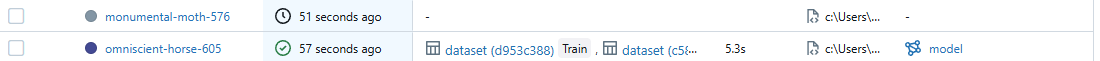

In [12]:
mlflow.end_run()

🏃 View run monumental-moth-576 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/c70f3ac8cbbb42b0a07ac6752bcf78a4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348


with mlflow.start_run():을 사용하면 
- 하나의 task에 대해서 mlflow가 하나의 job으로 인식하게됨

In [13]:
with mlflow.start_run():
    n_estimator = 30
    random_state = 1234
    max_depth = 2
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    prf = precision_recall_fscore_support(y_test, y_pred, average='binary')

    mlflow.log_metric('accuracy_on_test', accuracy)
    mlflow.log_metric('precision_on_test', prf[0])
    mlflow.log_metric('recall_on_test', prf[1])
    mlflow.log_metric('f1score_on_test', prf[2])

🏃 View run bemused-deer-720 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/a7a84a08ec2f4f86a72a240824c16204
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348


### <font color=yellow>3. mlflow를 활용한 모델 최적화 tracking</font>
- 직접 parameter 변경해가며 모델 최적화
- gridsearch 혹은 randomsearch를 활용하여 모델 최적화

#### <font color=red>3-1. 직접 parameter 변경해가며 모델 최적화</font>

In [15]:
def train_model_with_hyperparameters(n_estimator, max_depth, max_feature):
    with mlflow.start_run():     
        model = RandomForestClassifier(
            n_estimators=n_estimator, 
            max_depth=max_depth, 
            max_features=max_feature,
            random_state=random_state,
            )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        prf = precision_recall_fscore_support(y_test, y_pred, average='binary')

        mlflow.log_metric('accuracy_on_test', accuracy)
        mlflow.log_metric('precision_on_test', prf[0])
        mlflow.log_metric('recall_on_test', prf[1])
        mlflow.log_metric('f1score_on_test', prf[2])

In [16]:
n_estimators = [50, 100, 150, 200]
max_depths = [2, 5, 10]
max_features = [5, 8, 10, 13]

for n_estimator in n_estimators:
    for max_depth in max_depths:
        for max_feature in max_features:
            train_model_with_hyperparameters(n_estimator, max_depth, max_feature)

🏃 View run peaceful-flea-393 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/0bf9298670d1473f8cb80b2355ef2969
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348
🏃 View run masked-asp-388 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/352fc95f6aca43828b94d2bf812e8d14
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348
🏃 View run nimble-roo-164 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/fa9114ac9dfc4f92a7083d01606477c8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348
🏃 View run bedecked-gnu-275 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/4027a500e75f47b494d423fb907c7494
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348
🏃 View run big-fawn-707 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/d54914324c594b0bad8b8441bb5a0d30
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4124009334829593

#### <font color=red>3-2. GridSearch 혹은 RandomSearch를 활용하여 모델 최적화</font>

In [18]:
from sklearn.model_selection import GridSearchCV

with mlflow.start_run():
    model_grid = GridSearchCV(
        RandomForestClassifier(),
        {'n_estimators':[100, 200], 'max_depth':[20, 25]},
        )
    model_grid.fit(X_train, y_train)
    y_pred = model_grid.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    prf = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    mlflow.log_metric('accuracy_on_test', accuracy)
    mlflow.log_metric('precision_on_test', prf[0])
    mlflow.log_metric('recall_on_test', prf[1])
    mlflow.log_metric('f1score_on_test', prf[2])

2025/07/15 19:27:50 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


🏃 View run nervous-fowl-833 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/36ff20ac920c4eb0ba1b2110a4fd2f46
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348
🏃 View run serious-pug-809 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/fa793f1867a342c1802cffe3f0acc486
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348
🏃 View run worried-midge-114 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/305d3c20fb6b4b9c9da037060961897e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348
🏃 View run funny-lynx-650 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/efb3fab807954ef3a34fbf5539a21af9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482959348
🏃 View run salty-sloth-759 at: http://127.0.0.1:5000/#/experiments/412400933482959348/runs/4cb11270667d48e3bb03f8ee8b97c24e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412400933482